In [2]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

# Метод Рунге Кутта (явные)

In [3]:
def rk4(stepSize, timeVals, variables, diffFunc):
    for j in range(1, np.shape(timeVals)[0]):
        k1 = diffFunc(timeVals[j - 1], variables[j - 1])
        k2 = diffFunc(timeVals[j - 1] + 0.5 * stepSize, variables[j - 1] + 0.5 * stepSize * k1)
        k3 = diffFunc(timeVals[j - 1] + 0.5 * stepSize, variables[j - 1] + 0.5 * stepSize * k2)
        k4 = diffFunc(timeVals[j - 1] + stepSize, variables[j - 1] + stepSize * k3)
        variables[j] = variables[j - 1] + stepSize * (1 / 6 * k1 + 2 / 6 * k2 + 2 / 6 * k3 + 1 / 6 * k4)
    return timeVals, variables

# Метод Адамса

In [4]:
def adams(stepSize, timeVals, variables, diffFunc):
    nSteps = np.shape(variables)[0]
    fVals = np.zeros((nSteps, np.shape(variables[0])[0]))
    fVals[0] = diffFunc(timeVals[0], variables[0])
    variables[1] = variables[0] + stepSize * fVals[0]
    fVals[1] = diffFunc(timeVals[1], variables[1])
    variables[2] = variables[1] + stepSize * fVals[1]
    fVals[2] = diffFunc(timeVals[2], variables[2])
    for j in range(3, np.shape(timeVals)[0]):
        variables[j] = variables[j - 1] + stepSize * (23 / 12 * fVals[j - 1] - 16 / 12 * fVals[j - 2] + 5 / 12 * fVals[j - 3])
        fVals[j] = diffFunc(timeVals[j], variables[j])
    return timeVals, variables

# Метод ФДН

In [5]:
def bdf(stepSize, timeVals, variables, diffFunc):
    alpha_arr = np.array([2 / 11, -9 / 11, 18 / 11])
    beta = 6 / 11
    timeVals, variables = rk4(stepSize, timeVals, variables, diffFunc)
    for tau in range(3, len(timeVals)):
        variables_last = variables[-1]
        delta_y = np.dot(alpha_arr, variables[-3:])
        gamma = stepSize * beta
        variables_new = gamma * diffFunc(tau, variables_last) + delta_y
        while (np.linalg.norm(variables_last - variables_new) > 1e-4):
            variables_last = variables_new 
            variables_new = gamma * diffFunc(tau, variables_last) + delta_y
    return timeVals, variables

# Решение диф. уранения

In [6]:
def solveDiffEq(h, startT, endT, initialX, diffFunc, method):
    nSteps = int((endT - startT) / h) + 1
    tVals = np.linspace(startT, endT, nSteps)
    
    xVals = np.zeros((nSteps, np.shape(initialX)[0]))
    for i in range(np.shape(initialX)[0]):
        xVals[0][i] = initialX[i]
    return method(h, tVals, xVals, diffFunc)

# Сами диф. уравнения
$\begin{array}{ccl}
u' = A + u^2v - (B+1)v, \\
v' = Bu - u^2v,  \\
u(0) = 1, v(0) = 1 \\
A = 1;  B \in [1, 5]  \\
\end{array}$

In [89]:
def getDiffEqFunc(A, B):
    return lambda t, variables: np.array(
        [A + variables[1] * variables[0] ** 2 - (B + 1) * variables[1],     #variables[0] - u
         B * variables[0] - variables[1] * variables[0] ** 2])              #variables[1] - v

# Построение графиков

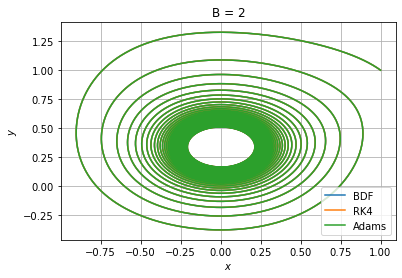

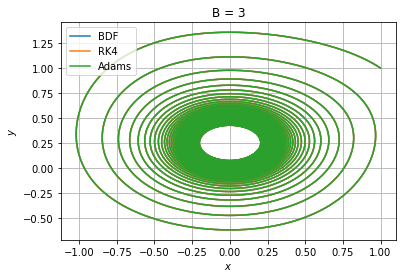

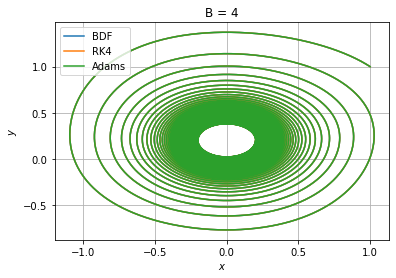

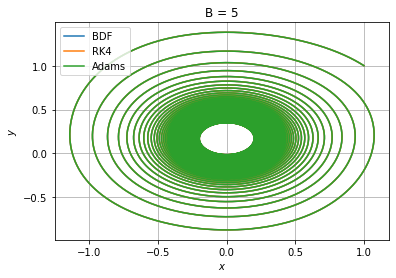

In [92]:
for b in range(2, 6):
    diffEq = getDiffEqFunc(1, b)
    step = 0.001
    
    for methodName, methodFunc in [("BDF", bdf),
                                   ("RK4", rk4),
                                   ("Adams", adams)]:
        timeSteps, solutionVector = solveDiffEq(step, 0, 100, np.array([1, 1]), diffEq, methodFunc)
        x1Vals = np.array([solutionVector[i][0] for i in range(np.shape(solutionVector)[0])])
        x2Vals = np.array([solutionVector[i][1] for i in range(np.shape(solutionVector)[0])])
        plt.plot(x1Vals, x2Vals, label=methodName)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(f'B = {b}')
    plt.show()
    plt.close()